# Anomaly Detection: Notebook 1: Initial Exploration and Tag Analysis via PyTrends

## Adam Podgorny

In [357]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pytrends as pt
from math import log
import numpy as np
from pytrends.request import TrendReq

In [358]:
data = pd.read_csv("US_youtube_trending_data.csv")

In [359]:
data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [360]:
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14193,ACzGSnVHjdo,WE ARE NBA CHAMPIONS!!! | Life in the Bubble -...,2020-10-16T02:00:13Z,UCNlhQwl2hGoMRRsQK722cTg,JaVale McGee,22,2020-10-21T00:00:00Z,JaVale McGee|Los Angeles Lakers|Golden State W...,1113891,72531,417,4549,https://i.ytimg.com/vi/ACzGSnVHjdo/default.jpg,False,False,THE LOS ANGELES LAKERS ARE 2020 NBA CHAMPIONS ...
14194,Adwl0y3qKUI,Hollywood Undead - Heart Of A Champion feat. P...,2020-10-16T04:00:10Z,UCYEIC1WKHEJHR971HIySQMg,Hollywood Undead,10,2020-10-21T00:00:00Z,Hollywood Undead|hollywood undead heart of a c...,507587,46292,410,2681,https://i.ytimg.com/vi/Adwl0y3qKUI/default.jpg,False,False,Hollywood Undead - Heart Of A Champion feat. J...
14195,vEnW8rLMJlc,Ty Dolla $ign - By Yourself (feat. Jhené Aiko ...,2020-10-16T04:00:23Z,UClVY6MdQxTZUaMDL-dLQDcw,Ty Dolla $ign,10,2020-10-21T00:00:00Z,ty dolla $ign|ty dolla sign paranoid|ty dolla ...,884439,20792,284,472,https://i.ytimg.com/vi/vEnW8rLMJlc/default.jpg,False,False,New album 'Featuring Ty Dolla $ign' available ...
14196,4QJacjZyQHA,Julie and the Phantoms BTS | Shot Compare Edge...,2020-10-16T17:00:10Z,UCgBMA7cbgYkZouLYs92BBbg,The Paul Becker Channel,24,2020-10-21T00:00:00Z,Kenny Ortega|Booboo Stewart|Owen Joyner|Maddi ...,384655,19600,76,741,https://i.ytimg.com/vi/4QJacjZyQHA/default.jpg,False,False,Okay Fantoms! you asked for it. Here is a co...


## Initial Data Exploration and Feature Engineering

In [ ]:
id_redundancies = data['video_id']
id_redundancies = id_redundancies.value_counts()
peaks = data['video_id'].apply(lambda x: id_redundancies.loc[x])

In [362]:
data['post_date'] = data['publishedAt'].apply(lambda x: x.split("T")[0])
data['post_time'] = data['publishedAt'].apply(lambda x: x.split("T")[1])
data['post_time'] = data['post_time'].apply(lambda x: x[0:len(x)-1])
data['trend_date'] = data['trending_date'].apply(lambda x: x.split("T")[0])
data['title_len'] = data['title'].apply(lambda x: len(x))
data['ratio'] = data.apply(lambda x: x['likes']/(x['dislikes'] + 0.01), axis=1)
data['engagement'] = data.apply(lambda x: x['likes'] + x['comment_count'] + x['dislikes'], axis=1)
data['e/v'] = data.apply(lambda x: x['engagement']/x['view_count'], axis=1)

In [363]:
data = data.drop(['trending_date', 'publishedAt', "thumbnail_link"], axis=1)
data = data.drop(['title'], axis=1) ##Since we know we can't search the title on pytrends
data = data.drop(['channelId'], axis=1)
data = data.drop(['description', 'comments_disabled', 'ratings_disabled'], axis=1)

In [364]:
categories = data['categoryId'].to_list()
categories=set(categories)
categories = list(categories)
categories

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]

## Tag Data Visualization & Misc Analytics

In [9]:
pre_tags = data['tags'].to_list()
#tags = tags.split("|")
tags = []
for i in pre_tags:
    t= (i.split("|"))
    for j in t:
        tags.append(j)
        
#tags = set(tags)
s_tags = pd.Series(tags)
tag_counts = s_tags.value_counts()
tag_counts = tag_counts[tag_counts > 1]

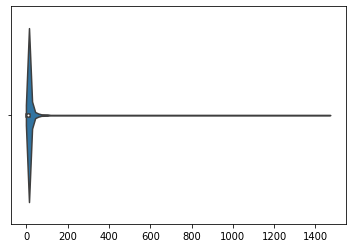

In [10]:
sns.violinplot(tag_counts)

In [11]:
tag_std = np.std(tag_counts)
tag_std

15.931136211717261

In [12]:
tag_mean = np.mean(tag_counts)
tag_ub = tag_mean + (tag_std*2)
tag_mean

8.661419681187393

In [13]:
data.corr()

,categoryId,view_count,likes,dislikes,comment_count,title_len,ratio,engagement
categoryId,1.000000,-0.092123,-0.107109,-0.064509,-0.070564,-0.018096,-0.059751,-0.101798
view_count,-0.092123,1.000000,0.919379,0.816765,0.762391,-0.060714,-0.056538,0.918302
likes,-0.107109,0.919379,1.000000,0.795667,0.805310,-0.085512,0.037204,0.990104
dislikes,-0.064509,0.816765,0.795667,1.000000,0.750305,-0.025125,-0.075408,0.825614
comment_count,-0.070564,0.762391,0.805310,0.750305,1.000000,-0.021782,-0.018803,0.879590
title_len,-0.018096,-0.060714,-0.085512,-0.025125,-0.021782,1.000000,-0.190750,-0.072614
ratio,-0.059751,-0.056538,0.037204,-0.075408,-0.018803,-0.190750,1.000000,0.022136
engagement,-0.101798,0.918302,0.990104,0.825614,0.879590,-0.072614,0.022136,1.000000


In [14]:
category_stdevs = data.groupby("categoryId").std()
category_means = data.groupby("categoryId").mean()
means = []
stdevs = []

In [15]:
category_stdevs

,view_count,likes,dislikes,comment_count,title_len,ratio,engagement
categoryId,,,,,,,
1,2.612684e+06,9.954705e+04,2584.387086,8545.154127,16.350782,122.597679,1.091344e+05
2,1.667478e+06,1.949681e+05,1078.370678,7234.627216,19.805780,95.721576,2.022310e+05
10,1.494147e+07,1.104009e+06,53532.863357,335077.970911,18.145551,89.220722,1.440330e+06
15,9.714276e+05,3.856115e+04,697.275681,3693.798371,16.792284,47.198666,4.210287e+04
17,2.253058e+06,7.761153e+04,2028.267544,4935.159479,21.876618,36.427198,8.305932e+04
19,2.190508e+05,9.555096e+03,184.289503,1333.006121,16.242677,33.799686,1.069862e+04
20,5.706922e+06,2.351516e+05,8990.320425,43641.545947,18.688984,53.285624,2.591903e+05
22,2.537819e+06,1.850343e+05,17035.068178,12889.532567,18.980726,102.763327,1.985233e+05
23,1.871707e+06,2.109579e+05,2387.801986,12567.649337,16.766569,95.388393,2.233775e+05


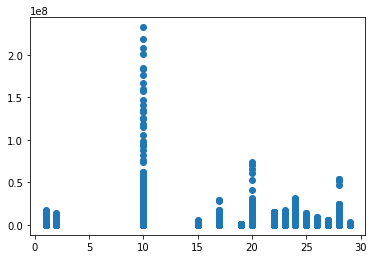

In [16]:
plt.scatter(data['categoryId'], data['view_count'])

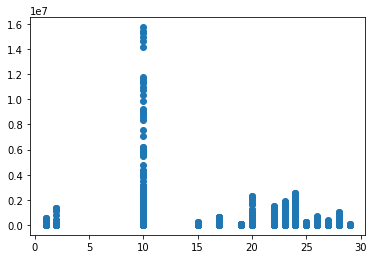

In [17]:
plt.scatter(data['categoryId'], data['likes'])

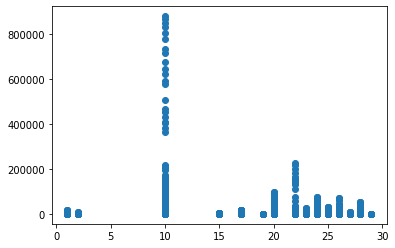

In [18]:
plt.scatter(data['categoryId'], data['dislikes'])

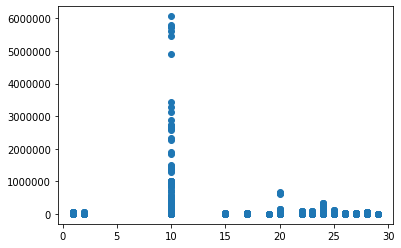

In [19]:
plt.scatter(data['categoryId'], data['comment_count'])

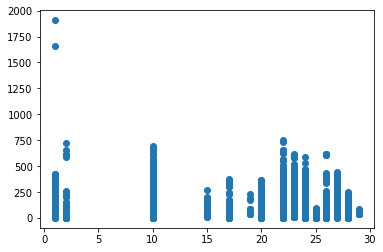

In [20]:
plt.scatter(data['categoryId'], data['ratio'])

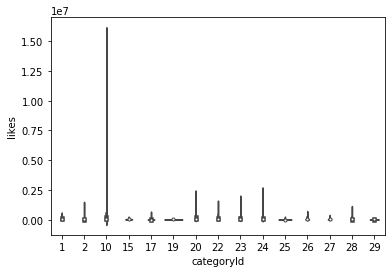

In [21]:
sns.violinplot(data['categoryId'], data['likes'])

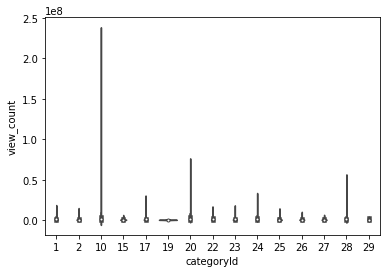

In [22]:
sns.violinplot(data['categoryId'], data['view_count'])

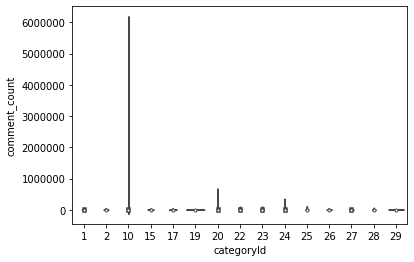

In [23]:
sns.violinplot(data['categoryId'], data['comment_count'])

In [24]:
cat_tags = []
low_cat_tags = []
middle_cat_tags = []
for i in categories:
    sub = data[data['categoryId'] == i]
    t_sub = []
    raws = sub['tags'].to_list()
    for j in raws:
        t = j.split("|")
        for k in t:
            if (k != "[None]"):
                t_sub.append(k)
    t_counts = pd.Series(t_sub).value_counts()
    ##Creating the plots to demonstrate viability here
    plt.hist(t_counts, density=True)
    plt.title("Category Tag Distribution")
    plt.legend(categories)
    plt.xlabel("Tag Counts")
    plt.ylabel("Tag Count Frequency")
    plt.xlim(0,70)
    plt.ylim(0,.50)
    plt.savefig(str("category_" + str(i) + "tag_counts.png"))
    plt.clf()
    sns.distplot(t_counts, kde=True)
    print(t_counts)
    t_counts = pd.DataFrame(t_counts, columns=["n"])
    #relevant = t_counts[t_counts["n"] > (2)]
    #relevant = relevant[t_counts["n"] < (ct_mean + (1*ct_std))]
    relevant = t_counts.index.tolist()
    relevant = relevant[0:5]
    irrelevant = t_counts.index.tolist()
    irrelevant = irrelevant[len(irrelevant)-5: len(irrelevant)]
    middle_cut = int(len(t_counts.index.tolist())/2)
    middle = t_counts.index.to_list()
    middle = middle[middle_cut-2: middle_cut+2]
    cat_tags.append(relevant)
    low_cat_tags.append(irrelevant)
    middle_cat_tags.append(middle)
plt.savefig("Seaborn Category Tag Distributions")

## PyTrends Analysis Begins Here
### Note: This may not work depending on how cooperative PyTrends will be with you. 
#### The most necessary subsampled data has been resaved to a CSV used in the more recent notebooks

In [25]:
trends = TrendReq(hl='en-US', tz=360)

In [26]:
trend_list = []
high_list = []
middle_list = []
low_list = []
for i in range(len((categories))):
    htrends = TrendReq(hl='en-US', tz=360)
    htrends.build_payload(cat_tags[i], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')
    high_list.append(htrends)
    mtrends = TrendReq(hl='en-US', tz=360)
    mtrends.build_payload(middle_cat_tags[i], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')
    middle_list.append(mtrends)
    ltrends = TrendReq(hl='en-US', tz=360)
    ltrends.build_payload(low_cat_tags[i], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')
    low_list.append(ltrends)

ResponseError: The request failed: Google returned a response with code 429.

#### Trying to establish baseline values per tag per use level

In [ ]:
middle_list[2].interest_over_time().mean().mean()

In [ ]:
high_list[6].interest_over_time().mean().mean()

In [ ]:
low_list[6].interest_over_time().mean().mean()

In [ ]:
high_m = []
mid_m = []
low_m = []
high_s = []
low_s = []
mid_s = []
for i in range(len(categories)):
    high_m.append(high_list[i].interest_over_time().mean().mean())
    mid_m.append(middle_list[i].interest_over_time().mean().mean())
    low_m.append(low_list[i].interest_over_time().mean().mean())
    high_s.append(high_list[i].interest_over_time().mean().std())
    mid_s.append(middle_list[i].interest_over_time().mean().std())
    low_s.append(low_list[i].interest_over_time().mean().std())

In [ ]:
tag_summary = pd.DataFrame([categories, high_m, mid_m, low_m, high_s, mid_s, low_s])

In [ ]:
tag_summary = tag_summary.T

In [ ]:
tag_summary = tag_summary.rename(columns={0:"Category", 1:"High Count Tags", 2: "Mid Count Tags", 3: "Low Count Tags",
                                          4: "High StDev", 5: "Mid StDev", 6: "Low StDev"})

In [ ]:
tag_summary

In [ ]:
##There is too much overlap to use the tag trend relationship as a predictor in an of itself

In [ ]:
sns.distplot(tag_summary['High Count Tags'])
sns.distplot(tag_summary['Low Count Tags'])
sns.distplot(tag_summary['Mid Count Tags']).set_title("Tag Trend Distribution")
#sns.title("Discretized Tag Distribution")
plt.xlabel("Average Tag Searches")
plt.ylabel("Frequency")
plt.savefig("tagtrenddist_large")

In [ ]:
high_list[0].interest_over_time().groupby("date").sum()

In [ ]:
ttrends = TrendReq(hl='en-US', tz=360)
ttrends.build_payload(['Hollywood Undead'], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')
test_trends = ttrends.interest_over_time()

In [ ]:
test_trends

In [ ]:
test_trends['x'] = test_trends.index.weekofyear

In [ ]:
test_trends

In [ ]:
data['trend_week'] = data['trend_date'].apply(lambda x: pd.to_datetime(x).weekofyear)
data['post_week'] = data['post_date'].apply(lambda x: pd.to_datetime(x).weekofyear)
data['trend_lag'] = data.apply(lambda x: pd.to_datetime(x['trend_date']).dayofyear - pd.to_datetime(x['post_date']).dayofyear,axis=1)

In [ ]:
data

In [ ]:
plt.scatter(data['categoryId'], data['trend_lag'])
plt.title("Category versus Trend Lag")
plt.xlabel("Category ID")
plt.ylabel("Trend Lag in Day")
plt.savefig("TrendLag.png")

In [9]:
channels = data['channelTitle'].to_list()
len(channels)

14198

In [10]:
channels = list(set(channels))
len(channels)

1529

#### This analysis angered Google
##### But we are trying to establish baseline tendancies per channel

In [30]:
#for i in channels:
#    c = TrendReq(hl='en-US', tz=360)
#    c.build_payload([i], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')

In [31]:
#c

In [32]:
c = TrendReq(hl='en-US', tz=360)
c.build_payload(['CBS News'], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')

ResponseError: The request failed: Google returned a response with code 429.

In [ ]:
t = c.interest_over_time()
t['w'] = t.index.weekofyear
plt.scatter(t.index,t['CBS News'])
plt.xticks(rotation=90)
plt.xlim('2020-08-11', '2020-10-15')

#### Test cases for proof of concept - Plots as well

In [ ]:
data[data['channelTitle'] == "CBS News"][['video_id','post_date', 'trend_date','trend_week']]

In [ ]:
t[t.index == ('2020-09-25'or'2020-10-01')]

In [ ]:
channels[1]

In [ ]:
c = TrendReq(hl='en-US', tz=360)
c.build_payload(['Cyberpunk 2077'], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')
t = c.interest_over_time()
t['w'] = t.index.weekofyear
plt.scatter(t['w'],t['Cyberpunk 2077'])
plt.clf()
#plt.scatter(t.index, t['Cyberpunk 2077'])
#plt.xticks(rotation=90)
print(t)

In [ ]:
data[data['channelTitle'] == "Cyberpunk 2077"][['trend_date','video_id', 'trend_week']]

In [ ]:
m = t['Cyberpunk 2077'].mean()

In [ ]:
st = t['Cyberpunk 2077'].std()

In [ ]:
t[t['Cyberpunk 2077'] > (m + (1.5 * st))]

In [ ]:
tg = t.groupby("w").mean()
tg_mean = tg['Cyberpunk 2077'].mean()
tg_stdev = tg['Cyberpunk 2077'].std()

In [ ]:
tg

In [ ]:
tg_mean

In [ ]:
tg_stdev

In [ ]:
def tag_split(tag_list):
    tl = tag_list.split("T")
    return tl

In [ ]:
data[data['channelTitle'] == "CBS News"]

In [38]:
pytrend = TrendReq()
#channel_trends = pd.DataFrame()
channel_trends = []
valid_channels = []
channels = channels[0:200]
for i in channels:
    c = TrendReq(hl='en-US', tz=360, timeout=(10,25), retries=2, backoff_factor=0.1)
    c.build_payload([i], geo="US", timeframe='2020-08-11 2020-10-15', gprop='youtube')
    temp = pd.DataFrame(c.interest_over_time())
    if (len(temp) != 0):
        valid_channels.append(i)
        temp = temp[i]
        temp = temp.T
        channel_trends.append(temp.T)

##### Used to generate the channel_trends data used for later analysis, made obselete for stability

In [501]:
pd.Series(channel_trends).to_csv("channel_trends_old.csv")

/Users/ns41388/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [431]:
pd.Series(valid_channels).to_csv("valid_channels_old")

/Users/ns41388/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Subset Trend Analysis - Initial Attempt
#### This is the first attempt, this is explored more in the 3rd Notebook
##### Initial attempt used an invalid scoring metric, but was somewhat promising.

In [503]:
ctdf = pd.DataFrame(channel_trends[0])

In [478]:
ctdf = ctdf.T

In [479]:
 for i in range(1,len(valid_channels)):
    ct_t = pd.DataFrame(channel_trends[i])
    ct_t = ct_t.T
    ctdf = ctdf.append(ct_t)

In [480]:
def in_v(x):
    if x in valid_channels:
        return True
    else:
        return False

data['v'] = data['channelTitle'].apply(lambda x: in_v(x))

In [502]:
len(valid_channels)
ctdf.to_csv("channel_trending_old.csv")

In [482]:
subdata = (data[data['v'] == True]).copy(deep=True)

In [483]:
ctdf = ctdf.reset_index()
ctdf = ctdf.rename(columns={"index": "channelTitle"})
ctdf.head()

date,channelTitle,2020-08-11 00:00:00,2020-08-12 00:00:00,2020-08-13 00:00:00,2020-08-14 00:00:00,2020-08-15 00:00:00,2020-08-16 00:00:00,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,...,2020-10-06 00:00:00,2020-10-07 00:00:00,2020-10-08 00:00:00,2020-10-09 00:00:00,2020-10-10 00:00:00,2020-10-11 00:00:00,2020-10-12 00:00:00,2020-10-13 00:00:00,2020-10-14 00:00:00,2020-10-15 00:00:00
0,Mystic,65,57,63,54,64,70,37,59,77,...,64,62,68,63,83,55,56,72,71,51
1,SuperSaf,0,0,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
2,euphoria,79,91,83,77,79,79,100,82,81,...,49,67,67,42,58,45,44,51,45,52
3,Ar'mon And Trey,47,94,73,71,31,46,43,63,96,...,51,50,88,49,73,68,87,45,61,95
4,Kurtis Conner,62,47,53,31,38,42,45,45,41,...,39,38,20,33,58,36,24,39,30,25


In [484]:
channel_ave = []
dates = ctdf.columns
dates = dates[1:len(ctdf.columns)]
for i in range(len(ctdf)):
    a = ctdf.iloc[i]
    #print(a)
    t = []
    for j in range(1,67):
        t.append(a[j])
   # sns.lineplot(x=dates, y=t)
    channel_ave.append(t)
    
#plt.savefig("trendsbychannel", dpi=300)

In [485]:
def st_iqr(c, m, s,f=1.5):
    if (c >= (m + (f*s))):
        return True
    else:
        return False

In [486]:
averages = [np.mean(x) for x in channel_ave]
stdevs = [np.std(x) for x in channel_ave]
trues = []

In [487]:
for i in range(len(ctdf)):
    a = ctdf.iloc[i]
    ts = 0
    t = []
    for j in range(1,67):
        if (st_iqr(a[j], averages[i], stdevs[i])):
            ts = ts+1
    trues.append(ts)


In [488]:
trues;

In [489]:
ctdf['channel_average'] = averages
ctdf['channel_std'] = stdevs
ctdf['trues'] = trues

In [490]:
subdata = subdata.merge(ctdf, left_on="channelTitle", right_on="channelTitle")

In [492]:
subdata.to_csv("subdata_old.csv")

In [493]:
id_redundancies = subdata['video_id']
id_redundancies = id_redundancies.value_counts()
subdata['peaks'] = subdata['video_id'].apply(lambda x: id_redundancies.loc[x])
ctdf['peaks'] = subdata['video_id'].apply(lambda x: id_redundancies.loc[x])

In [494]:
ctdf['squared_error'] = subdata.apply(lambda x: (x['peaks'] - x['trues'])*(x['peaks'] - x['trues']), axis=1)

In [496]:
subdata['squared_error'].mean()

6.767281105990784